In [ ]:
!pip install yfinance xgboost scikit-learn matplotlib pandas numpy

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [5]:
ticker = 'SPY'
start_date = '2018-01-01'
end_date = '2024-12-01'

print(f"Downloading {ticker} data from {start_date} to {end_date}...")
data = yf.download(ticker, start=start_date, end=end_date)

print(f"\nData downloaded successfully!")
print(f"Shape: {data.shape}")
print(f"\nFirst few rows:")
print(data.head())

print(f"\nColumns: {data.columns.tolist()}")

[*********************100%***********************]  1 of 1 completed


Data downloaded successfully!
Shape: (1740, 5)

First few rows:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2018-01-02  237.909180  237.944594  236.696491  237.085971  86655700
2018-01-03  239.413925  239.564417  238.077299  238.077299  90070400
2018-01-04  240.422989  240.909853  239.475870  240.060090  80636400
2018-01-05  242.025269  242.149179  240.724056  241.219754  83524000
2018-01-08  242.467834  242.627160  241.635765  241.927862  57319200

Columns: [('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]


DATA EXPLORATION

1. Dataset Shape: (1740, 5)
   - 1740 trading days
   - 5 columns

2. Date Range:
   - Start: 2018-01-02 00:00:00
   - End: 2024-11-29 00:00:00
   - Total days: 2523 days

3. Columns:
[('Close', 'SPY'), ('High', 'SPY'), ('Low', 'SPY'), ('Open', 'SPY'), ('Volume', 'SPY')]

4. Price Statistics:
Ticker          SPY
count   1740.000000
mean     360.896233
std       94.718044
min      206.111847
25%      266.306152
50%      368.846390
75%      423.215515
max      595.312439

5. Missing Values:
Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

6. First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker             SPY         SPY         SPY         SPY       SPY
Date                                                                
2018-01-02  237.909180  237.944594  236.696491  237.085971  86655700
2018-01-03  239.413925  239.564417  238.077299  238.077299  900704

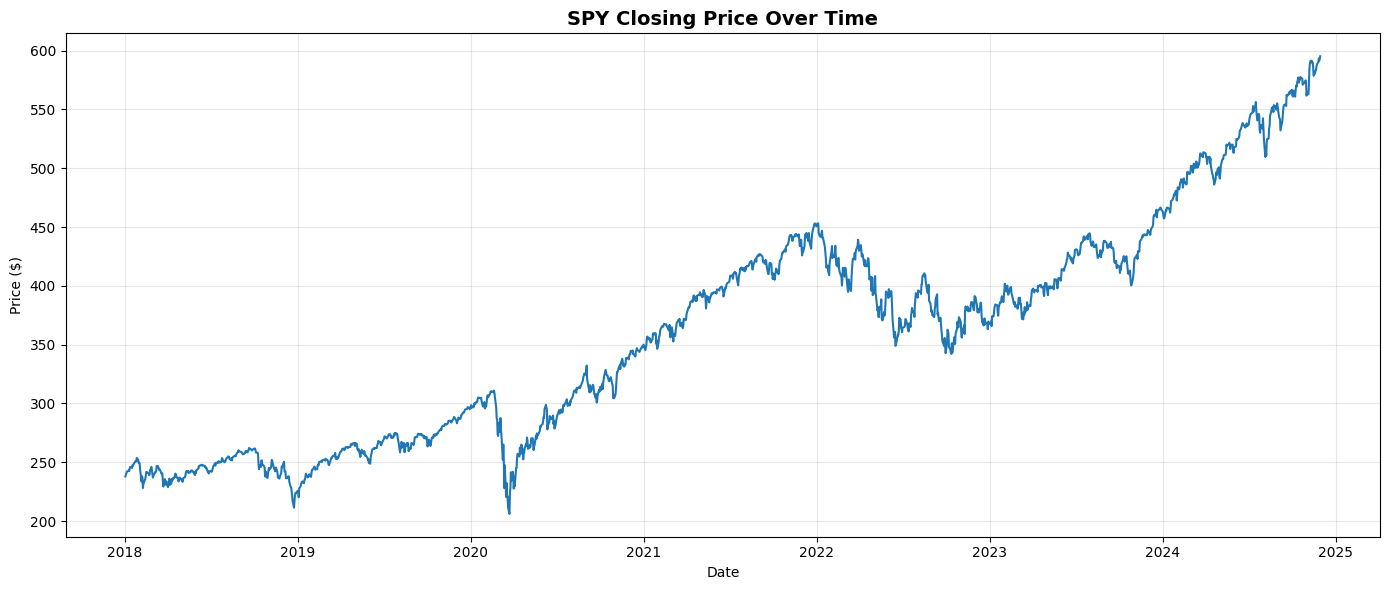


Data looks good! Ready to create features.


In [7]:
print("="*50)
print("DATA EXPLORATION")
print("="*50)

# Basic info
print(f"\n1. Dataset Shape: {data.shape}")
print(f"   - {data.shape[0]} trading days")
print(f"   - {data.shape[1]} columns")

# Date range
print(f"\n2. Date Range:")
print(f"   - Start: {data.index[0]}")
print(f"   - End: {data.index[-1]}")
print(f"   - Total days: {(data.index[-1] - data.index[0]).days} days")

# Column info
print(f"\n3. Columns:")
print(data.columns.tolist())

# Basic statistics
print(f"\n4. Price Statistics:")
print(data['Close'].describe())

# Check for missing values
print(f"\n5. Missing Values:")
print(data.isnull().sum())

# Sample data
print(f"\n6. First 5 rows:")
print(data.head())

print(f"\n7. Last 5 rows:")
print(data.tail())

# Quick visualization of closing price
print(f"\n8. Plotting closing price over time...")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], linewidth=1.5)
plt.title('S&P Closing Price Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Data looks good! Ready to create features.")
print("="*50)